<a href="https://colab.research.google.com/github/Krshnna/Machine-learning-project/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test = pd.read_csv('/content/test_titanic.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test.shape

(418, 11)

In [ ]:
df = df.append(test)

<ipython-input-507-186698f824e7>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(test)


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
df.drop(['Cabin'], axis = 1, inplace = True)

In [ ]:
df['Embarked'].fillna(df['Embarked']).mode()
df['Embarked'] = df['Embarked'].fillna(df['Embarked']).mode()[0]

In [ ]:
df['Age'] = df['Age'].fillna(df['Age']).mean()

In [ ]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


In [ ]:
df['Age'] = df['Age'].astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,29,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,29,1,0,PC 17599,71.2833,S
2,3,1.0,3,"Heikkinen, Miss. Laina",female,29,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,29,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,29,0,0,373450,8.0500,S


In [ ]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

<Axes: xlabel='SibSp', ylabel='count'>

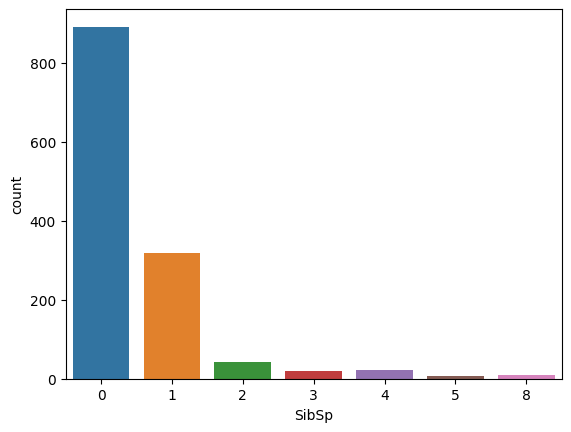

In [ ]:
sns.countplot(x = 'SibSp', data = df)

In [ ]:
df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

check the percentage of women and men survived

In [ ]:
women = df.loc[df.Sex == 'female']['Survived']
print(sum(women) / len(women))

# approx 75% women survived in titanic crash

nan


In [ ]:
men = df.loc[df.Sex == 'male']['Survived']
print(sum(men) / len(men))

# approx 19% men survived

nan


Lets see the visualization

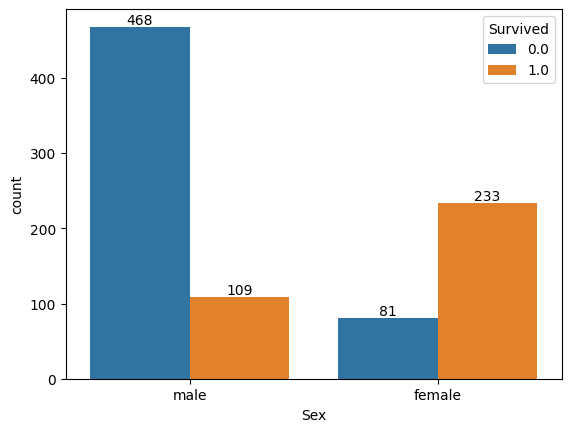

In [ ]:
ax = sns.countplot(x = 'Sex', hue = 'Survived', data = df)

for bar in ax.containers:
  ax.bar_label(bar)

# in survival 0 means no, 1 means yes

let's check pclass columns

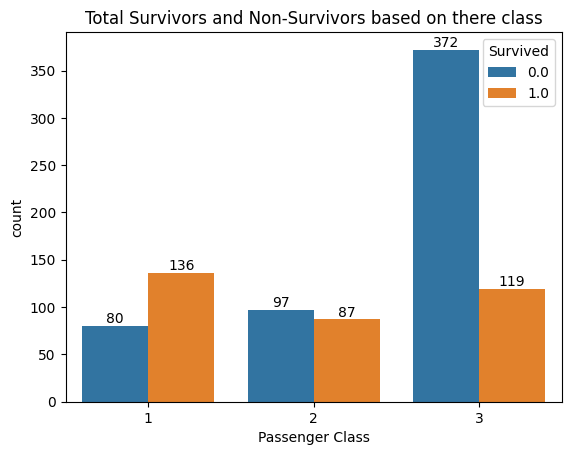

In [ ]:
ax = sns.countplot(x = 'Pclass', hue = 'Survived', data = df)
plt.xlabel("Passenger Class")
plt.title("Total Survivors and Non-Survivors based on there class")
for bars in ax.containers:
  ax.bar_label(bars)

# hence this shows that large number of people were died from 3rd class, which means that there first priorities were from 1st

now check survival count of people based on there classes

In [ ]:
survived_by_class = df.groupby(['Pclass', 'Sex'])['Survived'].sum()
survived_by_class = survived_by_class.reset_index()

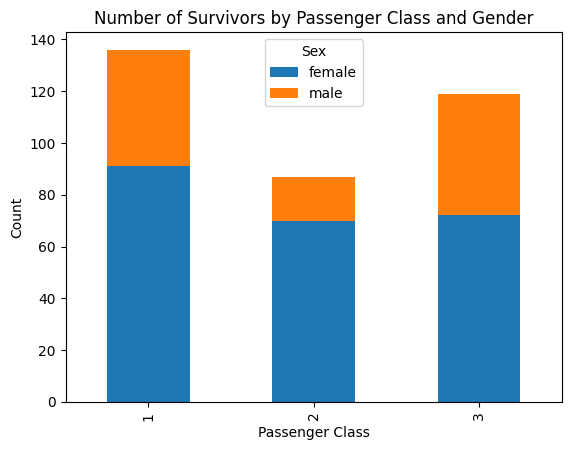

In [ ]:
survived_count = df[df['Survived'] == 1].groupby(['Pclass', 'Sex']).size().unstack()
survived_count.plot(kind='bar', stacked=True)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Number of Survivors by Passenger Class and Gender')
plt.show()

Transforming categorical columns

In [ ]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

1. MALE-> 1, FEMALE->0
2. S-> 0, Q-> 1, C->2

lets check correlation

<ipython-input-526-c49368b5a974>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

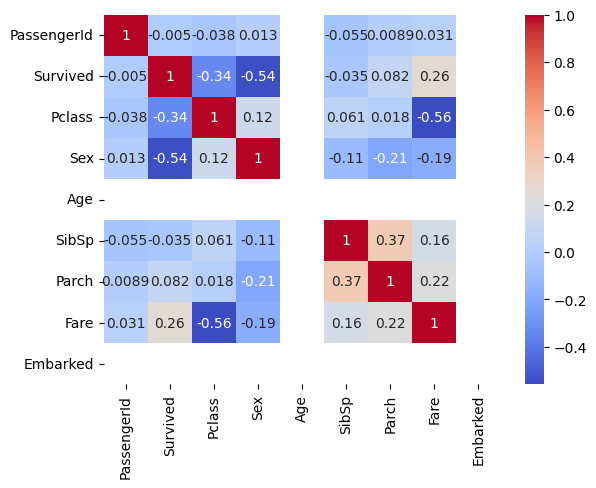

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

1. We can see that there is positive correlation between survived and fare, which indicates that those who paid higher fares were more likely the survivals

Training the model

In [ ]:
df_test = df[df['Survived'].isnull()]
df_train = df[~df['Survived'].isnull()]
df_train['Survived'] = df_train['Survived'].astype(int)

<ipython-input-527-7c09bb2a9451>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Survived'] = df_train['Survived'].astype(int)


In [ ]:
df_test.shape

(418, 11)

In [ ]:
feature = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
x = df_train[feature]
y = df_train['Survived']

train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 2)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
# x_train, x_test

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
df_test.fillna(df_test.mean(), inplace=True)
df_test.head()

<ipython-input-534-89c524e64b58>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test.fillna(df_test.mean(), inplace=True)
<ipython-input-534-89c524e64b58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.fillna(df_test.mean(), inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,NaN,3,"Kelly, Mr. James",1,29,0,0,330911,7.8292,0
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",0,29,1,0,363272,7.0000,0
2,894,NaN,2,"Myles, Mr. Thomas Francis",1,29,0,0,240276,9.6875,0
3,895,NaN,3,"Wirz, Mr. Albert",1,29,0,0,315154,8.6625,0
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,29,1,1,3101298,12.2875,0


In [ ]:
df_test.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [ ]:
df_tt = df_test.drop(['PassengerId','Survived','Name','Ticket','Embarked'], axis = 1)
predict = lr.predict(df_tt)

In [ ]:
# print(predict), print(df_test.shape)

In [ ]:
# prediction_score = accuracy_score(y_test, predict)
# print(prediction_score)

In [ ]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predict})
output.to_csv('submission.csv', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
